# Predicting Heart Failure

###### (https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data)

## About Dataset

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worlwide.
Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure.

Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

## Atribute Information:
### Thirteen (13) clinical features:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- [target] death event: if the patient deceased during the follow-up period (boolean)

# Importing data and EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Heart Failure Clinical Records.csv')

In [3]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


## Observation
- The scale of the features appear to be very different. [platelets] are in the millions and [serum_creatinine] is in the single digits (with decimals).
- There are no categorical variables

## Question(s):
Is there a reason to not feature scale except for interpretability?

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


## Observation
- No null values in dataset
- Small dataset with only 299 records and 13 columnds


In [5]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


## Observations:
- Age is a range from 40-95
- creatinine_phosphokinase may have an outlier. Max value is 15x the mean
- platelets may have an outlier. Max value is ~3x mean
- serum_creatinine may have an outlier. Max is ~7x mean

## Questions:
- How to determine if an outlier should be included? What should happen to outliers?

Histograms of each feature

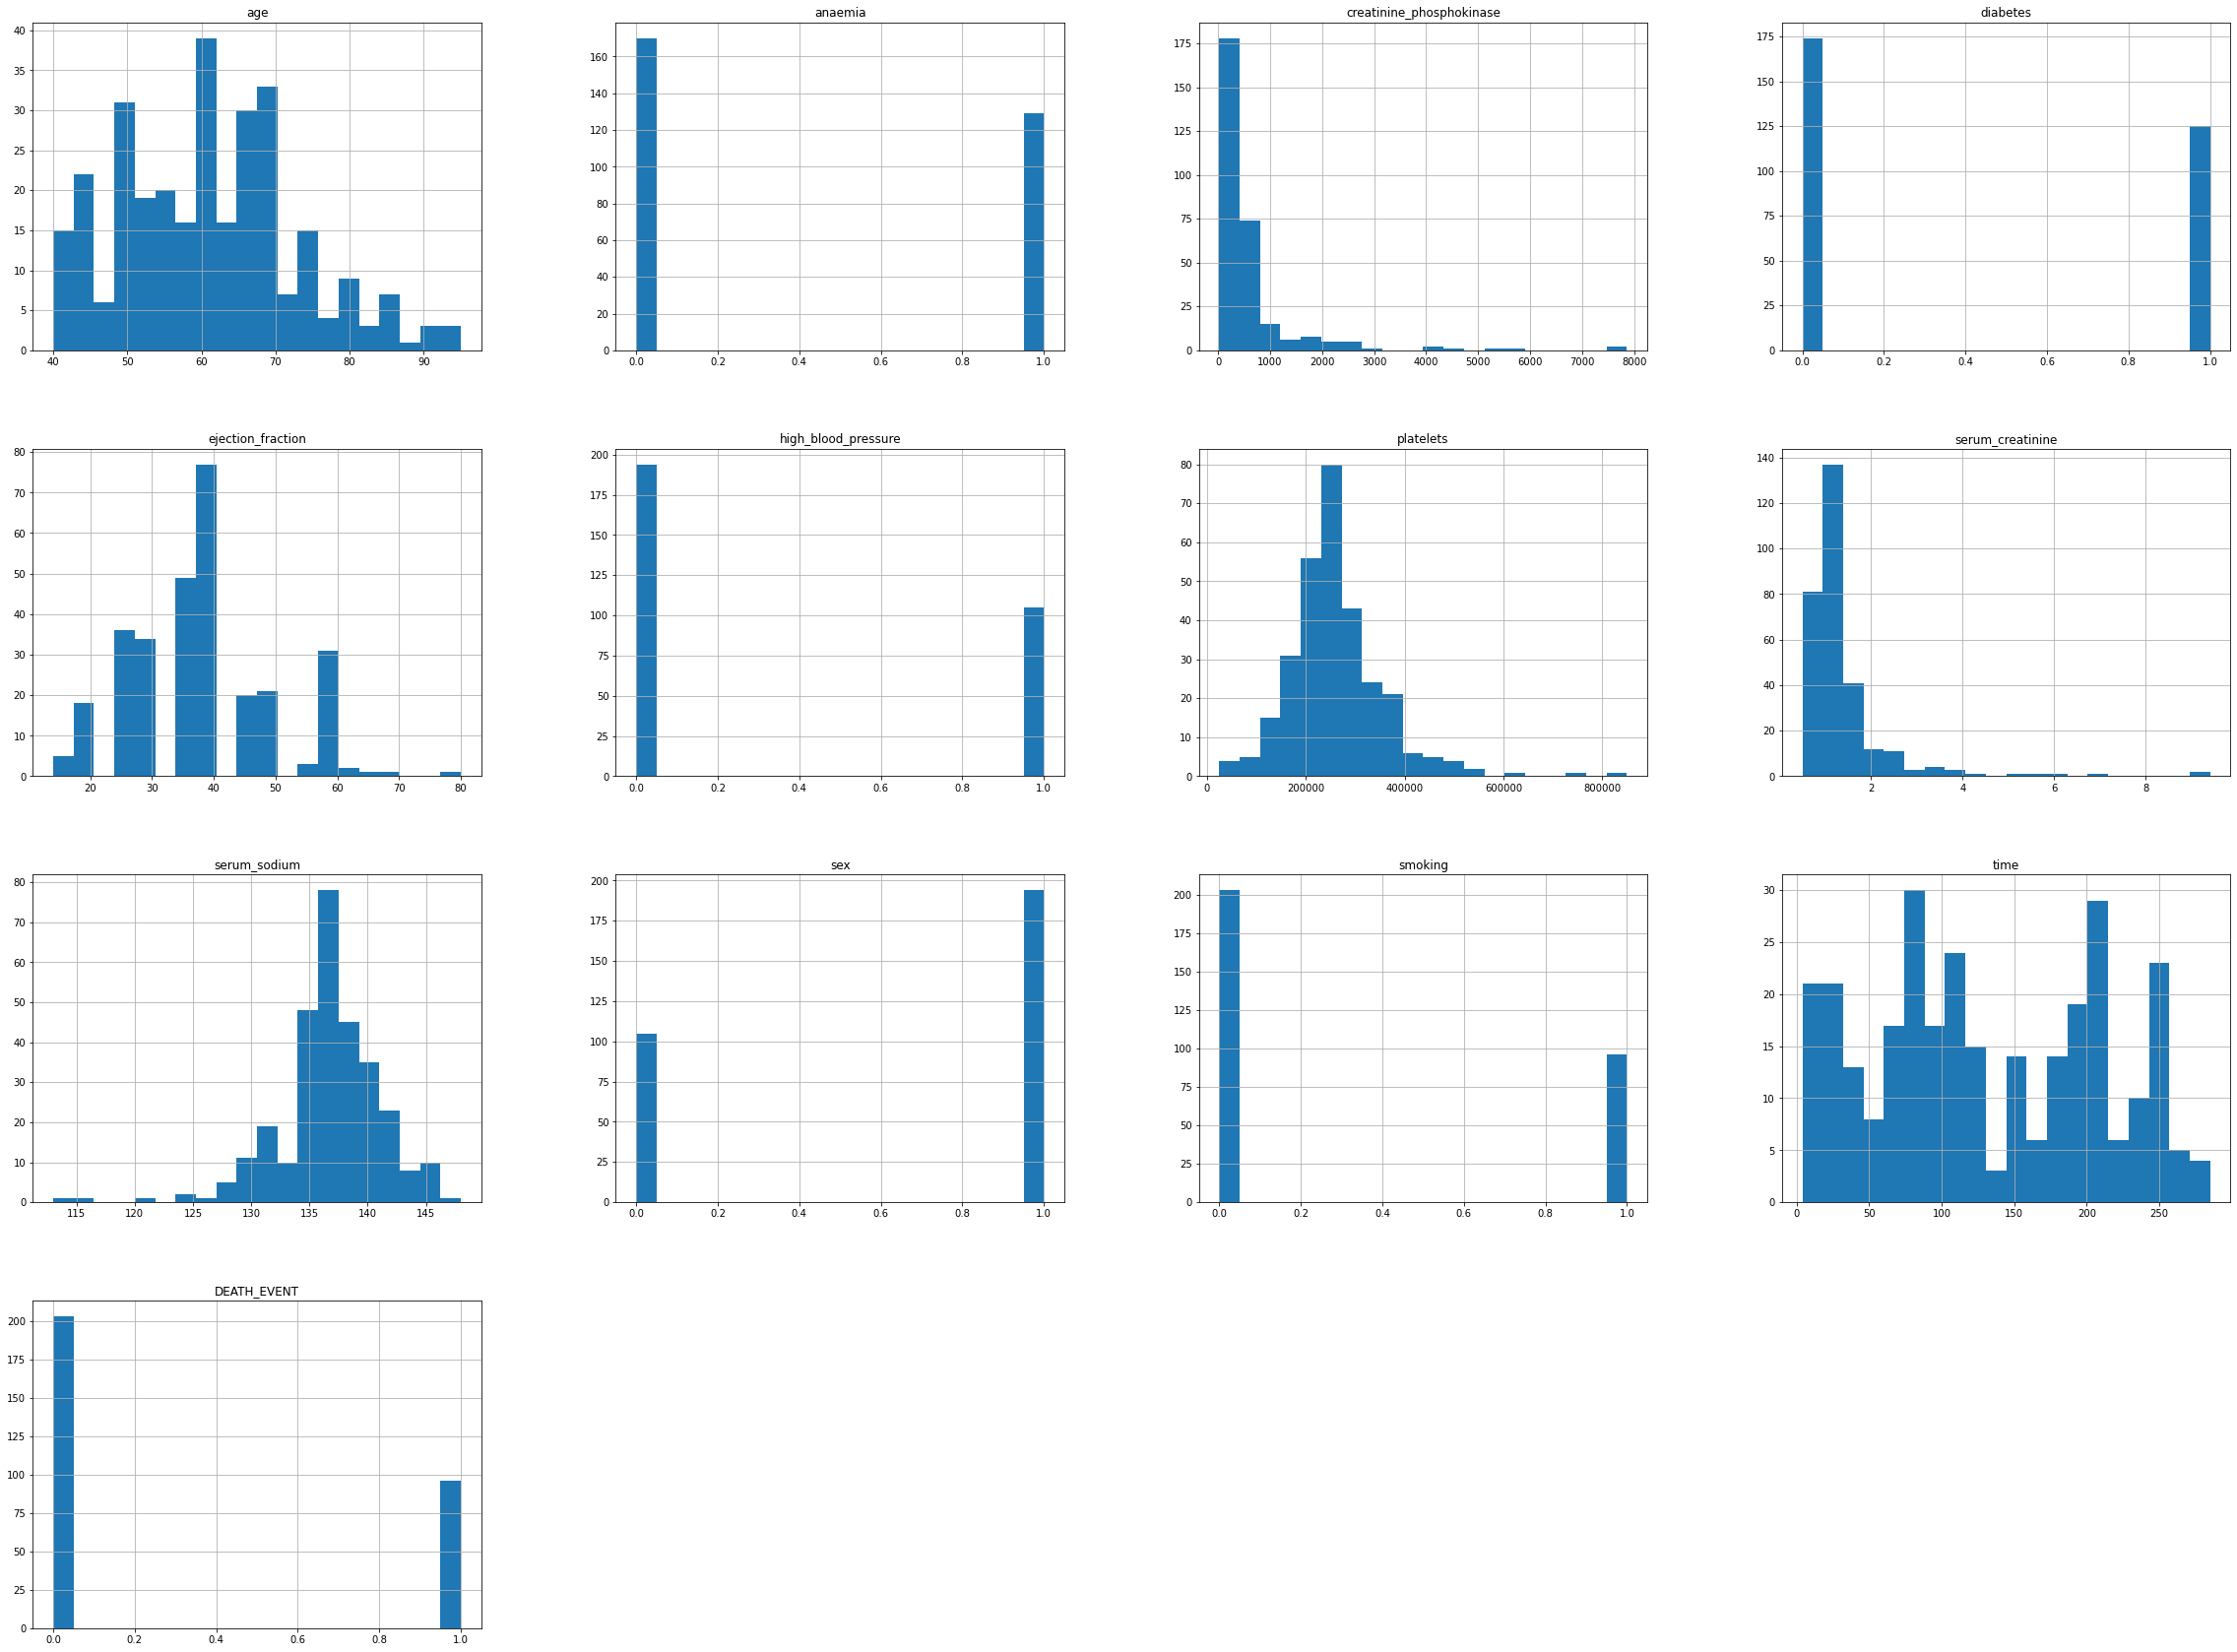

In [6]:
data.hist(bins=20, figsize=(40,30))
plt.show()

Moderate linear correlation between time and dependent variable

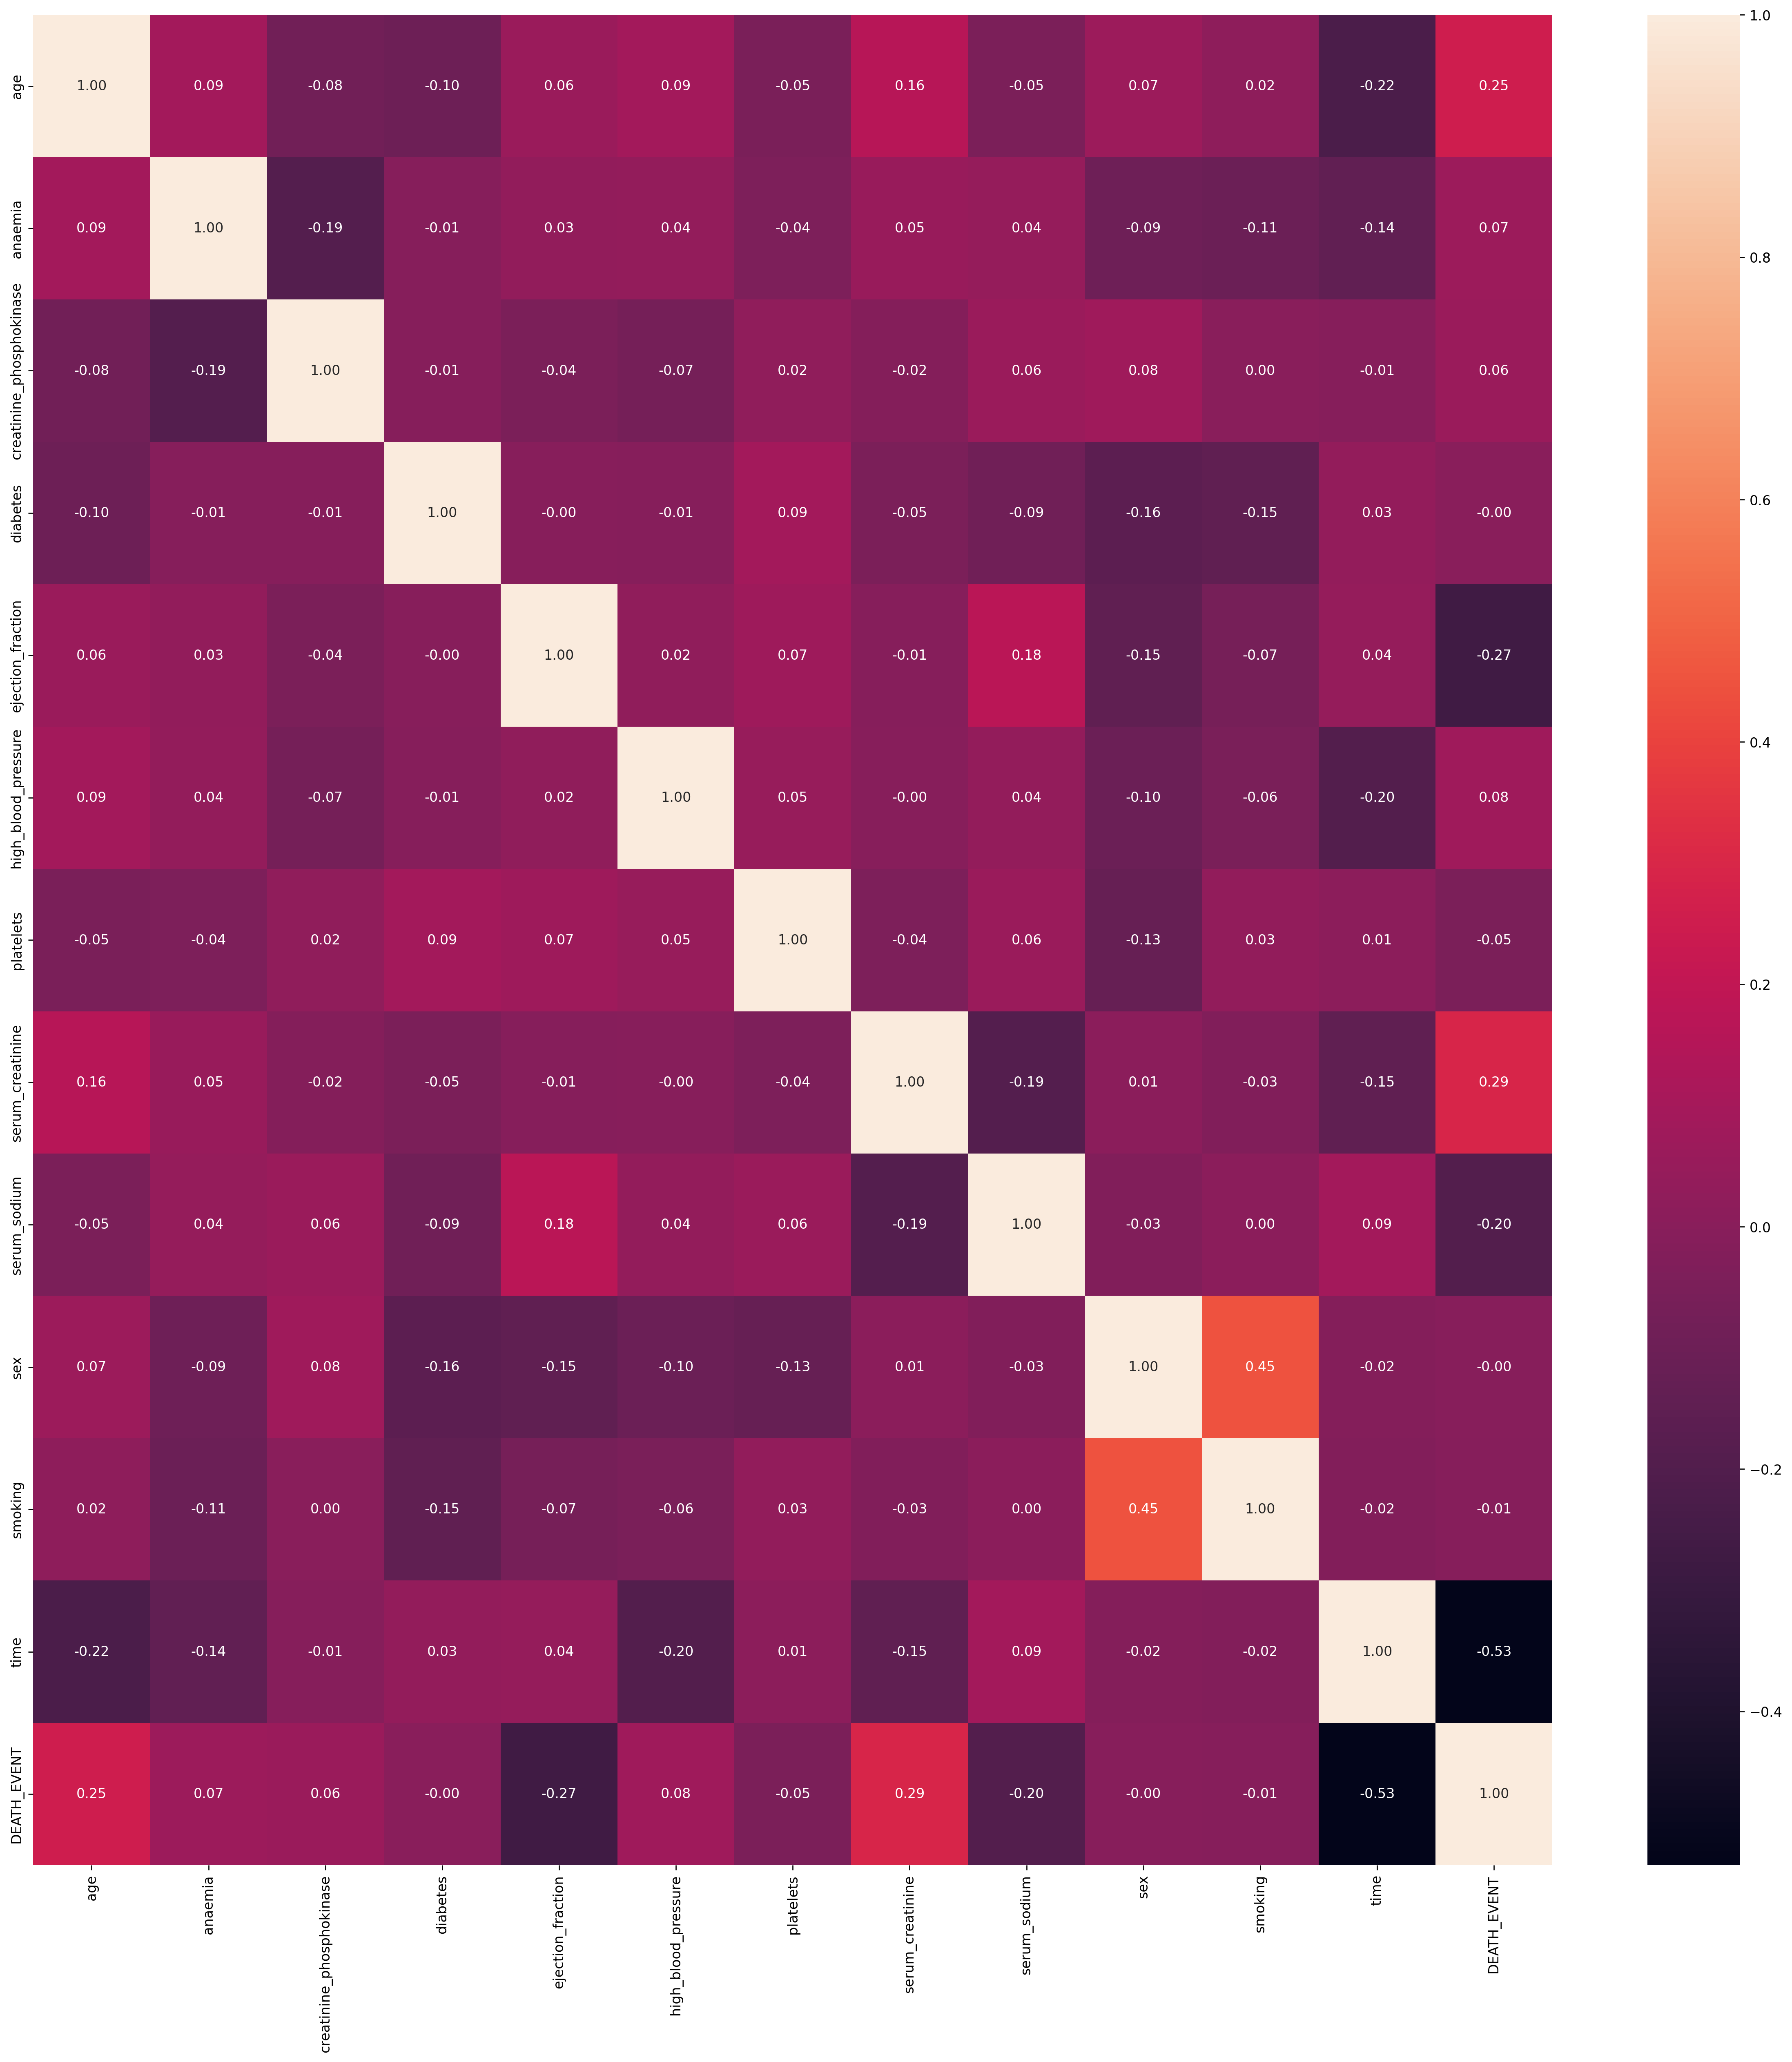

In [7]:
fig = plt.figure(figsize=(25,25), dpi = 240)
sns.heatmap(data.corr(), annot = True, fmt = '.2f')
plt.show()

# Splitting dataset into training and test set before further EDA

In [8]:
from sklearn.model_selection import train_test_split
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)


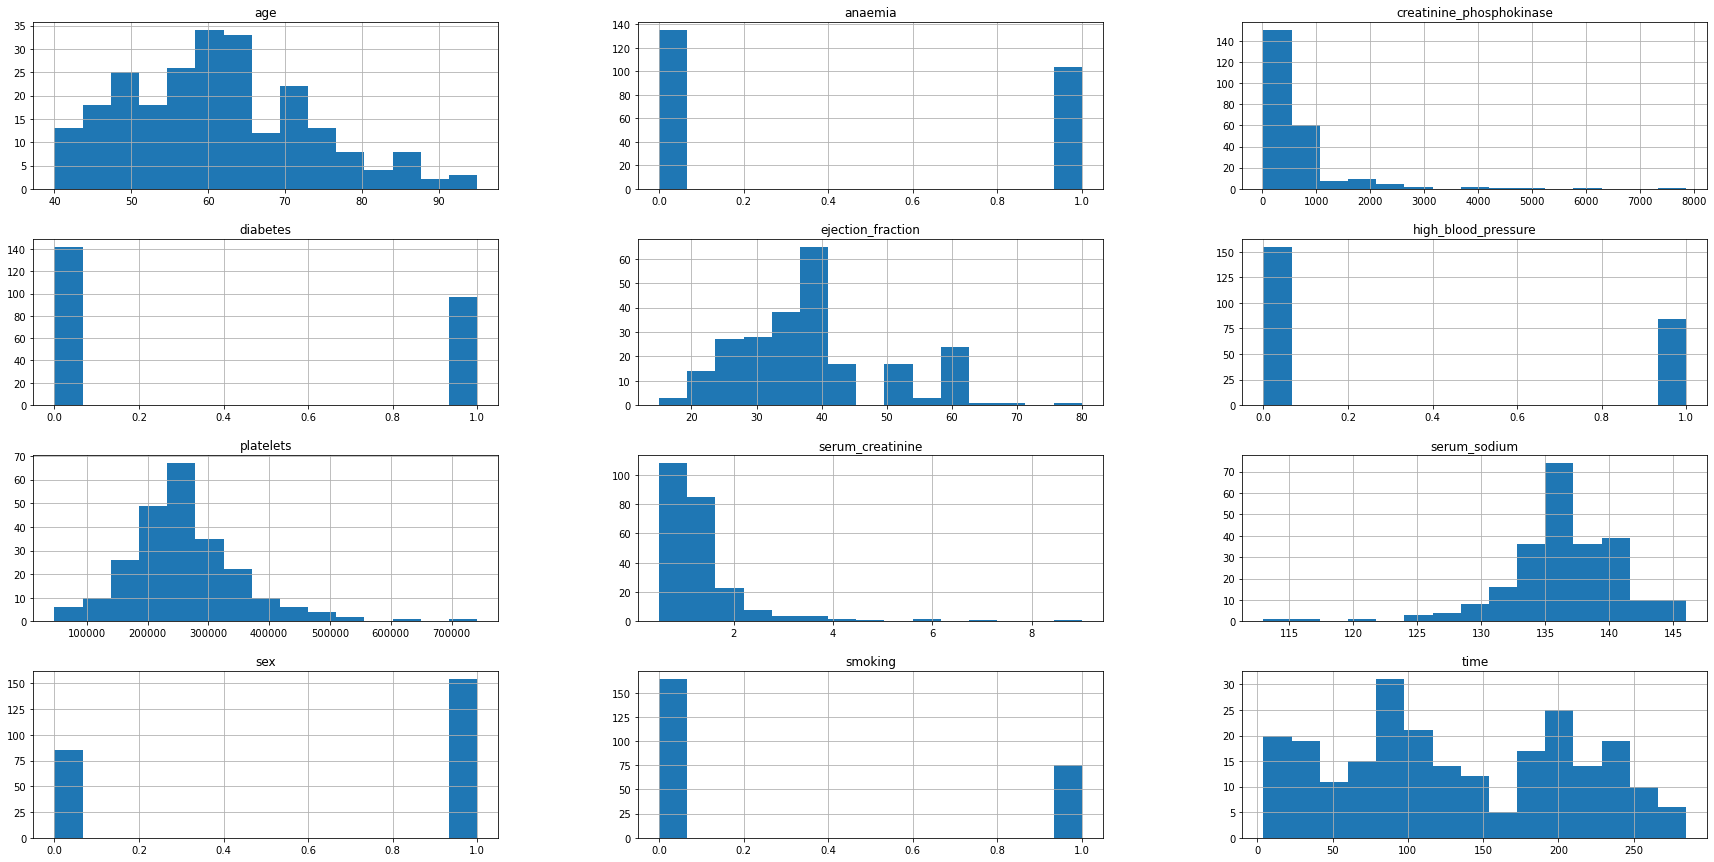

In [9]:
X_train.hist(bins=15, figsize=(30,15))
plt.show()

# Graphing features

Incidence of diabetes is higher in the mid-low age group in this dataset

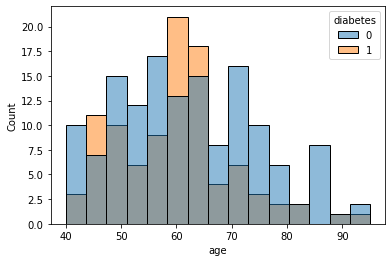

In [10]:
sns.histplot(data = X_train,
             x = 'age',
             bins = 15,
             hue = 'diabetes')
plt.show()


Almost half of each population bin smokes

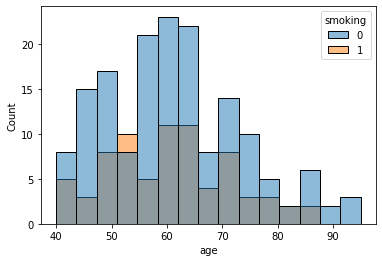

In [11]:
sns.histplot(data = X_train,
             x = 'age',
             bins = 15,
             hue = 'smoking')
plt.show()


High blood pressure disproportionatly affects the older population

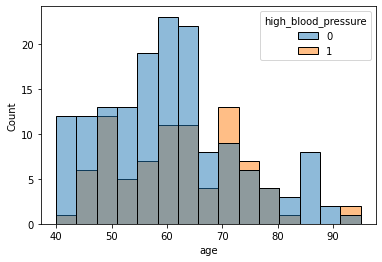

In [12]:
sns.histplot(data = X_train,
             x = 'age',
             bins = 15,
             hue = 'high_blood_pressure')
plt.show()

Histogram creatinine_phosphokinase to see outliers

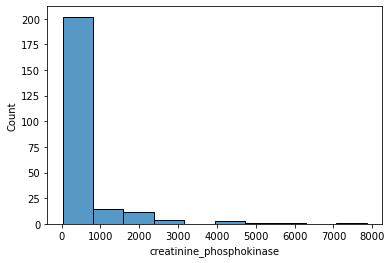

In [13]:
sns.histplot(data = X_train,
             x = 'creatinine_phosphokinase',
             bins = 10)
plt.show()

creatinine_phosphokinase has a lot of variance and is heavily skewed to the right

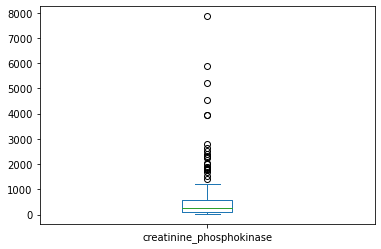

In [14]:
X_train.creatinine_phosphokinase.plot.box()
plt.show()

Platelets is skewed to the right

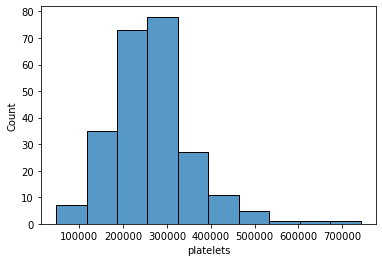

In [15]:
sns.histplot(data = X_train,
             x = 'platelets',
             bins = 10)
plt.show()

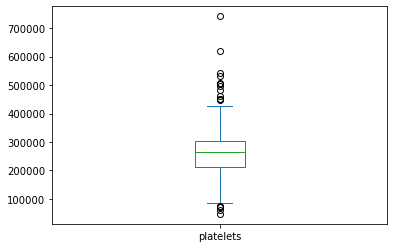

In [16]:
X_train.platelets.plot.box()
plt.show()

serum_creatinine has a few outliers. Should these be removed?

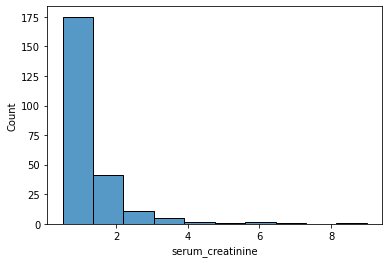

In [17]:
sns.histplot(data = X_train,
             x = 'serum_creatinine',
             bins = 10)
plt.show()

## EDA Takeaway's

- A few of the features have outliers. Should the outliers be removed or should they remain in the dataset?


- creatinine_phosphokinase 
    - According to google, the normal range of creatinine_phosphokinase is 10 to 120 micrograms per liter (mcg/L).
    - The standard deviation of mcg/L in this dataset is 970.29. Could there be something wrong with the values in this field? 

# Data Prep

- Only need to standardize numeric features as there are no categorical features to encode or null values to impute/remove


In [18]:
X_train.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time'],
      dtype='object')

In [19]:
numeric_columns = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time' ]

X_train_numeric = X_train[numeric_columns]


In [20]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler


pipeline = ColumnTransformer([('num', StandardScaler(), numeric_columns)], remainder='passthrough')

X_train_prepared = pipeline.fit_transform(X_train)

# Modeling

## Logistic Regression

In [102]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score

def classification_metrics(y_pred, y_test):
    cm = confusion_matrix(y_pred, y_test)
    accuracy = accuracy_score(y_pred, y_test)
    precision = precision_score(y_pred, y_test)
    print('Confusion Matrix: \n', cm)
    print('Accuracy: ', accuracy)
    print('Precision: ', precision)

In [74]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train_prepared, y_train)

y_pred = log_reg.predict(pipeline.transform(X_test))

classification_metrics(y_pred, y_test)

Confusion Matrix: 
 [[34 11]
 [ 1 14]]
Accuracy:  0.8
Precision:  0.56


In [78]:
def display_f1(scores):
    print('Scores:', scores)
    print('Mean', scores.mean())
    print('Standard Deviation', scores.std())

In [79]:
from sklearn.model_selection import cross_val_score
log_reg_f1 = cross_val_score(log_reg, X_train_prepared, y_train, 
                            scoring = 'f1', cv=10)
display_f1(log_reg_f1)

Scores: [0.66666667 0.93333333 0.70588235 0.76923077 0.92307692 0.85714286
 0.72727273 0.30769231 0.54545455 0.57142857]
Mean 0.7007181054239877
Standard Deviation 0.18163125510459127


In [80]:
from sklearn.model_selection import GridSearchCV

param_grid = [
        {'penalty': ['l1', 'l2'], 'C':np.linspace(0.1, 1, 10), 'solver':['liblinear']},
        {'penalty': ['l2', 'none'], 'C':np.linspace(0.1, 1, 10), 'solver':['lbfgs'], 'n_jobs':[-1]}
    ]

log_reg = LogisticRegression()

log_reg_grid_search = GridSearchCV(log_reg, param_grid, cv=10, 
                            scoring='f1',
                           return_train_score=True)

log_reg_grid_search.fit(X_train_prepared, y_train)

C:\Users\Ben\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Ben\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Ben\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Ben\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Ben\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Ben\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' wil

C:\Users\Ben\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Ben\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Ben\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Ben\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Ben\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Ben\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' wil

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid=[{'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                          'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
                         {'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                          'n_jobs': [-1], 'penalty': ['l2', 'none'],
                          'solver': ['lbfgs']}],
             return_train_score=True, scoring='f1')

In [81]:
log_reg_grid_search.best_params_

{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}

In [103]:
log_reg_final = LogisticRegression(C=0.1, penalty = 'l1', solver='liblinear')
log_reg_final.fit(X_train_prepared, y_train)
y_pred = log_reg_final.predict(pipeline.transform(X_test))
classification_metrics(y_pred, y_test)

Confusion Matrix: 
 [[33 10]
 [ 2 15]]
Accuracy:  0.8
Precision:  0.6


In [104]:
y_pred = log_reg_grid_search.predict(pipeline.transform(X_test))
classification_metrics(y_pred, y_test)

Confusion Matrix: 
 [[33 10]
 [ 2 15]]
Accuracy:  0.8
Precision:  0.6


In [105]:
print(f1_score(y_pred, y_test))

0.7142857142857143


## SVC

In [86]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train_prepared, y_train)
y_pred = svc.predict(pipeline.transform(X_test))

classification_metrics(y_pred, y_test)

Confusion Matrix: 
 [[32 11]
 [ 3 14]]
Accuracy:  0.7666666666666667
Precision:  0.56


In [96]:
svc_f1 = cross_val_score(svc, X_train_prepared, y_train, 
                            scoring = 'f1', cv=10)
display_f1(svc_f1)

Scores: [0.58823529 0.76923077 0.55555556 0.76923077 0.85714286 0.76923077
 0.72727273 0.4        0.54545455 0.71428571]
Mean 0.6695639001521354
Standard Deviation 0.13341541959399614


In [88]:
param_grid = [
        {'kernel': ['linear']},
        {'kernel': ['rbf', 'sigmoid'], 'C':[1, 5, 10], 'gamma':['scale', 'auto']},
        {'kernel': ['poly'], 'C':[1, 5, 10], 'gamma':['scale', 'auto'], 'degree':[2, 3, 4, 5, 6]}
    ]

svc = SVC()

svc_grid_search = GridSearchCV(svc, param_grid, cv=10, 
                            scoring='f1',
                           return_train_score=True)

svc_grid_search.fit(X_train_prepared, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'kernel': ['linear']},
                         {'C': [1, 5, 10], 'gamma': ['scale', 'auto'],
                          'kernel': ['rbf', 'sigmoid']},
                         {'C': [1, 5, 10], 'degree': [2, 3, 4, 5, 6],
                          'gamma': ['scale', 'auto'], 'kernel': ['poly']}],
             return_train_score=True, scoring='f1')

In [89]:
svc_grid_search.best_params_

{'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}

In [90]:
y_pred = svc_grid_search.predict(pipeline.transform(X_test))
classification_metrics(y_pred, y_test)

Confusion Matrix: 
 [[32 12]
 [ 3 13]]
Accuracy:  0.75
Precision:  0.52


## Random Forest

In [93]:
from sklearn.ensemble import RandomForestClassifier
rand_forest = RandomForestClassifier()
rand_forest.fit(X_train_prepared, y_train)
y_pred = rand_forest.predict(pipeline.transform(X_test))

classification_metrics(y_pred, y_test)

Confusion Matrix: 
 [[31 13]
 [ 4 12]]
Accuracy:  0.7166666666666667
Precision:  0.48


In [94]:
rf_f1 = cross_val_score(rand_forest, X_train_prepared, y_train, 
                            scoring = 'f1', cv=10)
display_f1(rf_f1)


Scores: [0.75       0.92307692 0.70588235 0.66666667 0.85714286 0.93333333
 0.875      0.57142857 0.83333333 0.85714286]
Mean 0.7973006895065717
Standard Deviation 0.11291606377363725


In [99]:
param_grid = [
        {'n_estimators': [3,10,30, 50, 100, 200], 'max_features':[2,4,6,8,10], 'criterion':['gini', 'entropy', 'log_loss'], 'n_jobs':[-1]},
        {'bootstrap':[False], 'n_estimators': [3, 10], 'max_features':[2,3,4], 'n_jobs':[-1]},
    ]

forest_reg = RandomForestClassifier()

rf_grid_search = GridSearchCV(forest_reg, param_grid, cv=10, 
                            scoring='f1',
                           return_train_score=True)

rf_grid_search.fit(X_train_prepared, y_train)

C:\Users\Ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [func(*args, *

C:\Users\Ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [func(*args, *

C:\Users\Ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [func(*args, *

C:\Users\Ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [func(*args, *

C:\Users\Ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [func(*args, *

C:\Users\Ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [func(*args, *

C:\Users\Ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [func(*args, *

C:\Users\Ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [func(*args, *

C:\Users\Ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [func(*args, *

C:\Users\Ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [func(*args, *

C:\Users\Ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [func(*args, *

C:\Users\Ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [func(*args, *

C:\Users\Ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [func(*args, *

C:\Users\Ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [func(*args, *

C:\Users\Ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [func(*args, *

C:\Users\Ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [func(*args, *

C:\Users\Ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [func(*args, *

C:\Users\Ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [func(*args, *

C:\Users\Ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [func(*args, *

C:\Users\Ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [func(*args, *

C:\Users\Ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [func(*args, *

C:\Users\Ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [func(*args, *

C:\Users\Ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [func(*args, *

C:\Users\Ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [func(*args, *

C:\Users\Ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [func(*args, *

C:\Users\Ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [func(*args, *

C:\Users\Ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [func(*args, *

C:\Users\Ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [func(*args, *

C:\Users\Ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [func(*args, *

C:\Users\Ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [func(*args, *

C:\Users\Ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [func(*args, *

C:\Users\Ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [func(*args, *

C:\Users\Ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [func(*args, *

C:\Users\Ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [func(*args, *

C:\Users\Ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [func(*args, *

C:\Users\Ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [func(*args, *

C:\Users\Ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [func(*args, *

C:\Users\Ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [func(*args, *

C:\Users\Ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [func(*args, *

C:\Users\Ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [func(*args, *

C:\Users\Ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [func(*args, *

C:\Users\Ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [func(*args, *

C:\Users\Ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [func(*args, *

C:\Users\Ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [func(*args, *

C:\Users\Ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [func(*args, *

C:\Users\Ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [func(*args, *

C:\Users\Ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [func(*args, *

C:\Users\Ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [func(*args, *

C:\Users\Ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [func(*args, *

C:\Users\Ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [func(*args, *

C:\Users\Ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [func(*args, *

C:\Users\Ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [func(*args, *

C:\Users\Ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [func(*args, *

C:\Users\Ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [func(*args, *

C:\Users\Ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [func(*args, *

C:\Users\Ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [func(*args, *

C:\Users\Ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [func(*args, *

C:\Users\Ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [func(*args, *

C:\Users\Ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [func(*args, *

C:\Users\Ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [func(*args, *

C:\Users\Ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [func(*args, *

C:\Users\Ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [func(*args, *

C:\Users\Ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [func(*args, *

C:\Users\Ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [func(*args, *

C:\Users\Ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [func(*args, *

C:\Users\Ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [func(*args, *

C:\Users\Ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [func(*args, *

C:\Users\Ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [func(*args, *

C:\Users\Ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [func(*args, *

C:\Users\Ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [func(*args, *

C:\Users\Ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [func(*args, *

C:\Users\Ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [func(*args, *

C:\Users\Ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [func(*args, *

C:\Users\Ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [func(*args, *

C:\Users\Ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [func(*args, *

C:\Users\Ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [func(*args, *

C:\Users\Ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [func(*args, *

C:\Users\Ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [func(*args, *

C:\Users\Ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [func(*args, *

C:\Users\Ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [func(*args, *

C:\Users\Ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [func(*args, *

C:\Users\Ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [func(*args, *

C:\Users\Ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [func(*args, *

C:\Users\Ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [func(*args, *

C:\Users\Ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [func(*args, *

C:\Users\Ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [func(*args, *

C:\Users\Ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [func(*args, *

C:\Users\Ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [func(*args, *

C:\Users\Ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [func(*args, *

C:\Users\Ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [func(*args, *

C:\Users\Ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [func(*args, *

C:\Users\Ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [func(*args, *

C:\Users\Ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [func(*args, *

C:\Users\Ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [func(*args, *

C:\Users\Ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [func(*args, *

C:\Users\Ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [func(*args, *

C:\Users\Ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [func(*args, *

C:\Users\Ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [func(*args, *

C:\Users\Ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [func(*args, *

C:\Users\Ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\Ben\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [func(*args, *

C:\Users\Ben\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.54838384 0.68475857 0.74902764 0.78823843 0.76269064 0.78921079
 0.72327583 0.65544095 0.77332628 0.78071042 0.7895696  0.78264001
 0.73561674 0.77131648 0.75285494 0.76987708 0.74801879 0.74665266
 0.72558442 0.71291067 0.72295567 0.74777375 0.76232547 0.75477204
 0.65892857 0.68015563 0.76627069 0.76718238 0.72315934 0.74699342
 0.69215951 0.73830503 0.74263403 0.77977106 0.75653895 0.79408258
 0.69010712 0.72268364 0.7768886  0.75972361 0.79266479 0.79266479
 0.66991391 0.74490509 0.76798633 0.790126   0.77430667 0.77627441
 0.66849539 0.72038462 0.7354146  0.74014701 0.75552893 0.75162201
 0.69812384 0.67166667 0.74305763 0.75243854 0.76529784 0.7433683
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan 

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy', 'log_loss'],
                          'max_features': [2, 4, 6, 8, 10],
                          'n_estimators': [3, 10, 30, 50, 100, 200],
                          'n_jobs': [-1]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10], 'n_jobs': [-1]}],
             return_train_score=True, scoring='f1')

In [100]:
rf_grid_search.best_params_

{'criterion': 'entropy', 'max_features': 2, 'n_estimators': 200, 'n_jobs': -1}

In [101]:
y_pred = rf_grid_search.predict(pipeline.transform(X_test))
classification_metrics(y_pred, y_test)

Confusion Matrix: 
 [[34 15]
 [ 1 10]]
Accuracy:  0.7333333333333333
Precision:  0.4


## XGBoost

In [63]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train_prepared, y_train)
y_pred = xgb.predict(pipeline.transform(X_test))

classification_metrics(y_pred, y_test)

[11:35:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Confusion Matrix: 
 [[29 10]
 [ 6 15]]
Accuracy:  0.7333333333333333
Precision:  0.6


C:\Users\Ben\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [97]:
xgb_f1 = cross_val_score(xgb, X_train_prepared, y_train, 
                            scoring = 'f1', cv=10)

C:\Users\Ben\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Ben\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Ben\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label 

[13:56:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:56:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:56:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:56:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\Users\Ben\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Ben\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Ben\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label 

In [98]:
display_f1(xgb_precision)

Scores: [0.8        0.85714286 0.66666667 0.72727273 0.76923077 0.93333333
 0.82352941 0.57142857 0.6        0.875     ]
Mean 0.762360433683963
Standard Deviation 0.11371588503417858


## Conclusion

Given the standardized dataset with no feature engineering, a logistic regression model had the highest f1 score; beating support-vector classifier, random forest, and XGboost models. It's also important to note that the logistic regression model had the highest accuracy and precision across all models (thus leading to the highest f1 score).

If I had an opportunity to ask a domain expert about the dataset, I would like to know how certain outliers should be dealt with. A couple of features (mainly creatinine phosphokinase) had very long-tailed distributions and it's possible that outliers should have been removed from the dataset; allowing the models to train on more relevant data.